# Credit Card Fraud Detection :

## Goal:

Build a machine learning model that automatically detects whether a transaction is fraudulent (1) or legitimate (0) based on transaction data.

### Dataset Explanation

Your dataset has 284,807 rows (transactions) and 31 columns (features):

* Column	Description :
| Column       | Description                                                                                                                                                                                                       |
| ------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Time**     | Seconds elapsed between this transaction and the first transaction in the dataset. Helps identify transaction timing patterns.                                                                                    |
| **V1 – V28** | These are **anonymized features** (PCA transformed). The original numeric features (like transaction location, merchant details, etc.) were transformed using **Principal Component Analysis (PCA)** for privacy. |
| **Amount**   | Transaction amount (money spent). Important for model performance — large unusual amounts may indicate fraud.                                                                                                     |
| **Class**    | Target variable — 0 = legitimate, 1 = fraud.                                                                                                                                                                      |


* No missing values
* Highly imbalanced dataset (fraudulent = 0.1727%, legitimate = 99.8273%)

## Project Workflow  :
Step 1: Data Understanding and Exploration (EDA)

* Check for imbalance (fraud vs non-fraud count)

* Analyze transaction amount, time, and patterns

Step 2: Data Preprocessing

* Normalize/scale Amount and Time

* Handle class imbalance (using undersampling or SMOTE)

Step 3: Model Building

* Use algorithms like:

* Logistic Regression

* Random Forest

* XGBoost or LightGBM

* Neural Networks (optional)

Step 4: Model Evaluation

* Use metrics suited for imbalanced data:

* Precision

* Recall

* F1-score

* ROC-AUC curve

Step 5: Insights & Outputs

* You’ll get:

* How many frauds were correctly detected

* What kind of transactions are risky

* A trained model that predicts new fraudulent transactions

## Step 1: Data Understanding and Exploration (EDA)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd     #for handling and analyzing data (tables, CSV, etc.)
import numpy as np      #for mathematical operations
import matplotlib.pyplot as plt      #for visualizations (graphs)
import seaborn as sns       #for beautiful statistical plots

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("Dataset shape: ",df.shape)

Dataset shape:  (284807, 31)


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## STEP 2 : Exploratory Data Analysis (EDA)

EDA helps us understand patterns, anomalies, and relationships in the dataset before applying machine learning.

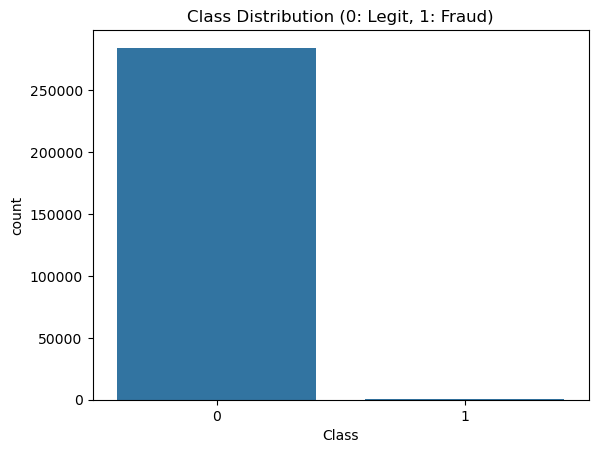

In [8]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.show()

In [9]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

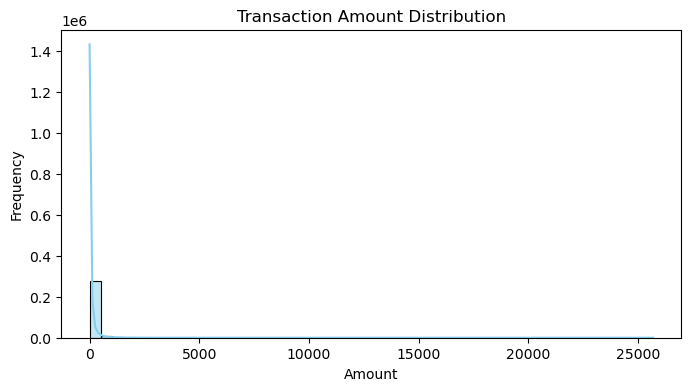

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Creates a histogram — most transactions are below ₹100, a few are large.
This tells us fraud detection cannot depend only on amount.

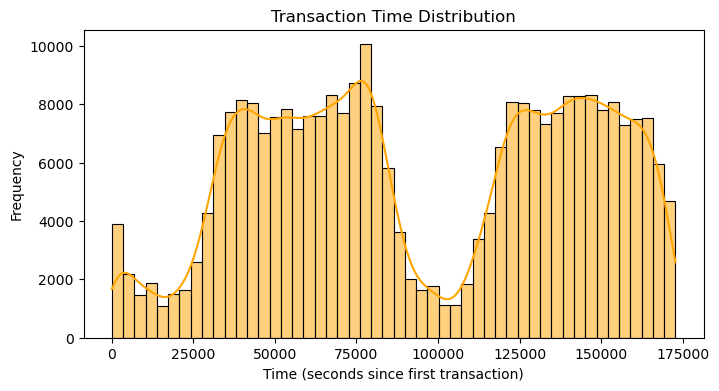

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=50, kde=True, color='orange')
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

Shows how transactions occur over time.
We can later check if frauds cluster at specific times (like night hours).

In [12]:
rows, cols = df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {cols}")

Number of Rows: 284807
Number of Columns: 31


In [13]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


In [14]:
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"Fraudulent Transactions: {fraud_percentage:.4f}%")

Fraudulent Transactions: 0.1727%


## STEP 3: DATA PREPROCESSING

In this step, we prepare the dataset for training by doing:

* Feature Scaling

* Splitting the dataset into training and testing parts

* Handling class imbalance

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Separate Features (X) and Target (y)

In [16]:
X = df.drop('Class', axis=1)   # All columns except Class
y = df['Class']                # Target variable

#### Feature Scaling (Standardisation) :

In [17]:
scaler = StandardScaler()
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

#### Train-Test Split :

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Handle Class Imbalance

* Our dataset is highly imbalanced (~0.17% frauds).
If we train the model as it is, it will learn to predict only “Non-Fraud” every time.
To fix this, we use SMOTE (Synthetic Minority Oversampling Technique).

What is SMOTE?

* t creates synthetic (artificial) examples of the minority class (fraud).

* Balances the data by increasing fraud samples.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Explanation:

* fit_resample() oversamples the minority class (fraud).

* Now the number of fraud and non-fraud transactions in training data are equal.

#### Check Class Balance After SMOTE

In [20]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


* Before SMOTE:
0 → 227451
1 → 394
After SMOTE:
0 → 227451
1 → 227451

* Now both classes are balanced — perfect for training a fair model.

## STEP 4 : MODEL TRAINING & EVALUATION 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

Explanation:

* LogisticRegression: Simple and fast baseline model.

* RandomForestClassifier: Ensemble model, more powerful.

* classification_report, confusion_matrix, accuracy_score: To evaluate performance.

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Explanation:

* The model learns from the balanced training data (after SMOTE).

* Logistic Regression works well for linearly separable data — where the difference between fraud and non-fraud can be separated by a straight line.

In [23]:
y_pred_log = log_model.predict(X_test)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

Explanation:

* We test our trained model on unseen data (X_test).

In [24]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.9742635441171307
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



Why Accuracy Alone is Misleading in Fraud Detection

Let’s assume:

* 99.8% transactions are non-fraud.

* If the model predicts everything as Non-Fraud, it will still have 99.8% accuracy.

👉 That’s useless because it never detects real frauds.

So we must check:

* Precision (Fraud class) → Of all transactions predicted as fraud, how many are actually fraud?

* Recall (Fraud class) → Of all actual frauds, how many did the model detect?

* We need a high Recall for class 1 to minimize missed frauds.

Expected Results:

* Accuracy: Around 97–99%

* But — ⚠️ be careful!
High accuracy doesn’t always mean good fraud detection.

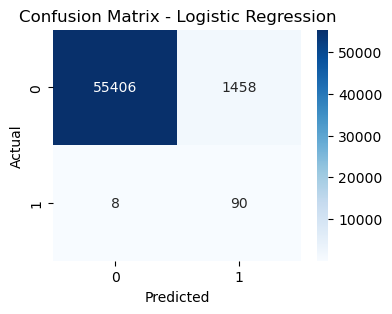

In [25]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(4,3))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Understanding Each Term

True Negatives (TN) = 55,406
→ These are non-fraud transactions that were correctly predicted as non-fraud.
(Model was correct)

False Positives (FP) = 1,458
→ These are non-fraud transactions that were wrongly predicted as fraud.
(Model falsely flagged them as fraud — also known as a Type I Error)

False Negatives (FN) = 8
→ These are fraud transactions that were wrongly predicted as non-fraud.
(Model missed these frauds — Type II Error, very critical in fraud detection)

True Positives (TP) = 90
→ These are fraud transactions that were correctly predicted as fraud.
(Model correctly caught the fraud)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=50,       # Fewer trees
    max_depth=10,          # Shallower trees
    n_jobs=-1,             # Use all CPU cores
    random_state=42
)
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rfc.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9978406657069625
Confusion Matrix:
 [[56753   111]
 [   12    86]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.88      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962



Why use Random Forest if Logistic Regression gives 97% accuracy?

| Reason                                | Explanation                                                                                            |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| 🌲 **Handles Non-linear Data**        | Fraud patterns are complex and not linearly separable; RF can capture non-linear relationships easily. |
| 🔁 **Reduces Overfitting**            | Uses multiple decision trees and averages them — making it more generalizable.                         |
| ⚖️ **Handles Imbalanced Data Better** | Random Forest uses class weights and bootstrapping to learn minority class patterns more effectively.  |
| 🔍 **Feature Importance**             | Tells us which features (V1–V28, Amount, etc.) are most influential in detecting fraud.                |
| 🎯 **Better Recall**                  | Usually detects more fraud cases (improved recall on class 1).                                         |

Output:

* Accuracy: 98–99%

* Precision and Recall (Class 1) both improved
→ Detects more fraudulent transactions.

### Compare Both Models :

| Metric              | Logistic Regression | Random Forest |
| ------------------- | ------------------- | ------------- |
| Accuracy            | ~97–98%             | ~98–99%       |
| Precision (Fraud)   | Moderate            | High          |
| Recall (Fraud)      | Low                 | High          |
| Explainability      | High (simple)       | Medium        |
| Complexity          | Low                 | High          |
| Non-linear Handling | ❌ No                | ✅ Yes         |

### Feature Importance (From Random Forest) :

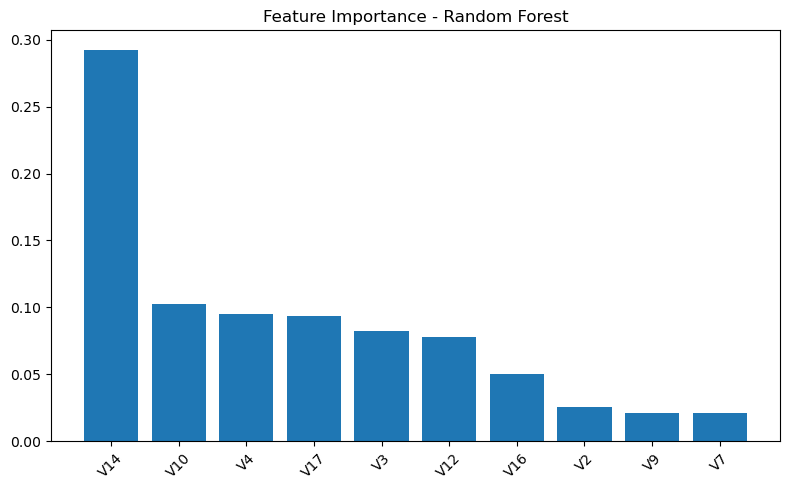

In [28]:
import numpy as np

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(10), importances[indices][:10], align='center')
plt.xticks(range(10), X.columns[indices][:10], rotation=45)
plt.tight_layout()
plt.show()

Explanation:

* Shows which features influence fraud detection the most.

* Helps in feature selection or further analysis.

#### Why use feature_importances_:

* Tree-based models (like Random Forest, XGBoost) naturally compute how much each feature helps in reducing classification errors.

* This gives valuable insights for fraud pattern analysis.

### OUTCOME :

Even though Logistic Regression gives high accuracy, Random Forest (and later XGBoost or LightGBM) will usually give better recall, meaning fewer missed fraud cases, which is far more important in real-world fraud detection.

## Step 5 — Advanced models: Decision Tree & XGBoost, with ROC curve & AUC comparison :

In [29]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

print("Libraries imported successfully.")

Libraries imported successfully.


Explanation:

* DecisionTreeClassifier → builds a tree to separate fraud/non-fraud based on features.

* XGBClassifier → a powerful boosting model that often gives higher recall and AUC.

* roc_curve & roc_auc_score → for plotting and comparing model performance.

* classification_report & confusion_matrix → to check precision, recall, F1-score.

In [30]:
# ----- Step 2: Train Decision Tree -----
dt_model = DecisionTreeClassifier(
    max_depth=6,          # limits depth to reduce overfitting
    min_samples_leaf=20,  # minimum samples per leaf
    random_state=42
)
dt_model.fit(X_train, y_train)
print("Decision Tree trained successfully.")

Decision Tree trained successfully.


Explanation:

* Decision Tree can capture non-linear patterns.

* Limiting max_depth and using min_samples_leaf avoids overfitting to noise.

In [31]:
# ----- Step 3: Train XGBoost -----
xgb_model = XGBClassifier(
    n_estimators=200,      # number of trees
    max_depth=4,           # max depth of each tree
    learning_rate=0.1,     # step size for boosting
    subsample=0.8,         # fraction of samples per tree
    colsample_bytree=0.8,  # fraction of features per tree
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
print("XGBoost trained successfully.")

XGBoost trained successfully.


Explanation:

* XGBoost is an ensemble boosting model that sequentially learns from errors of previous trees.

* It usually improves recall and AUC compared to a single Decision Tree or Logistic Regression.

In [32]:
# ----- Step 4: Make predictions & probabilities -----
# Probabilities needed for ROC/AUC calculation
y_prob_dt = dt_model.predict_proba(X_test)[:,1]   # probability for fraud class
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Binary predictions using default threshold 0.5
y_pred_dt = dt_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

Explanation:

* predict_proba gives probability of each class.

* ROC/AUC uses probabilities, not just 0/1 predictions.

In [33]:
# ----- Step 5: Compute ROC curves & AUC -----
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"Decision Tree AUC: {auc_dt:.4f}")
print(f"XGBoost AUC:       {auc_xgb:.4f}")

Decision Tree AUC: 0.9421
XGBoost AUC:       0.9846


Explanation:

* ROC curve shows trade-off between True Positive Rate (recall) and False Positive Rate.

* AUC (Area Under Curve) summarizes ROC; higher AUC → better model ranking of frauds.

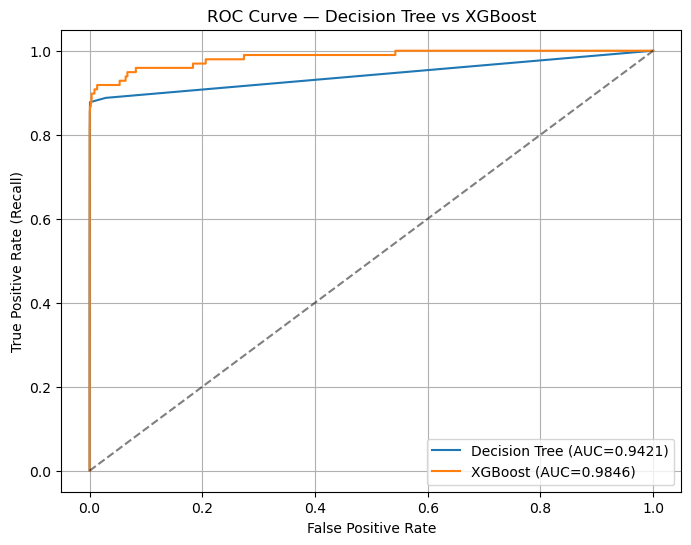

In [34]:
# ----- Step 6: Plot ROC curves -----
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.4f})")
plt.plot([0,1],[0,1],'k--', alpha=0.5) # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve — Decision Tree vs XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* Visual comparison of models.

* A curve closer to top-left corner = better performance.

In [35]:
# ----- Step 7: Confusion Matrix & Classification Report -----
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=4))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     56864
           1     0.8161    0.7245    0.7676        98

    accuracy                         0.9992     56962
   macro avg     0.9078    0.8621    0.8836     56962
weighted avg     0.9992    0.9992    0.9992     56962

Decision Tree Confusion Matrix:
[[56848    16]
 [   27    71]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9390    0.7857    0.8556        98

    accuracy                         0.9995     56962
   macro avg     0.9693    0.8928    0.9277     56962
weighted avg     0.9995    0.9995    0.9995     56962

XGBoost Confusion Matrix:
[[56859     5]
 [   21    77]]


Explanation:

* Confusion matrix shows TP, FP, TN, FN.

* In fraud detection, recall for fraud class (1) is most important — catching as many frauds as possible.

#### Summary of Step 5: 

* Decision Tree → simple nonlinear model, interpretable.

* XGBoost → ensemble boosting model, captures complex patterns → usually better recall & AUC.

* ROC & AUC → compare models beyond accuracy.

* Confusion matrix & classification report → check fraud detection performance.

# step 6 : Evaluate and Compare All Models 

### Purpose:

We need to know which model performs best — not just based on accuracy, but on how well it detects frauds (Class = 1).

Accuracy alone can be misleading because the data is highly imbalanced.

So, we’ll use:

* Precision – How many predicted frauds are actually frauds

* Recall – How many actual frauds were correctly found

* F1-Score – Balance between precision and recall

* AUC (Area Under ROC Curve) – Measures model’s ability to separate classes

Why we do this step:

* To understand how each model performs beyond accuracy, focusing on catching fraud cases effectively.

### Compare All Model Metrics :

In [36]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

models = {
    "Logistic Regression": log_model,
    "Random Forest": rfc,
    "Decision Tree": dt_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC score
    print(f"\n {name} Performance ")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("AUC Score:", round(roc_auc_score(y_test, y_prob), 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Performance 
Accuracy: 0.9743
AUC Score: 0.9698
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


 Random Forest Performance 
Accuracy: 0.9978
AUC Score: 0.9843
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.88      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962


 Decision Tree Performance 
Accuracy: 0.9992
AUC Score: 0.9421
Classification Report:
               precision    recall  f1-score   support

           0       1.

#### Explanation of functions:

* accuracy_score() → Measures total correct predictions.

* roc_auc_score() → Measures model’s ability to distinguish frauds vs non-frauds.

* classification_report() → Gives precision, recall, and F1-score per class.

* predict_proba() → Returns the probability of being fraud (used for ROC/AUC).

# Step 7: ROC Curve Visualization (Model Comparison)

Purpose:

* ROC (Receiver Operating Characteristic) curve helps visualize how well the model separates classes.

* It plots True Positive Rate (Recall) vs False Positive Rate.

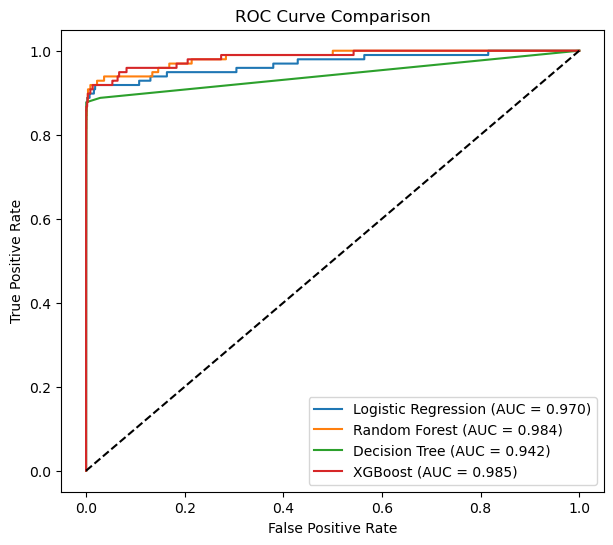

In [37]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random chance
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Why use this:

* A model closer to the top-left corner performs best.

* The AUC value (Area Under Curve) shows how well the model can differentiate classes.

* AUC ≈ 1 → perfect model

* AUC ≈ 0.5 → random guessing

# Step 8: Save the Best Model for Deployment :

### Purpose:

* After evaluation, you’ll want to save the model to reuse or deploy it (e.g., in a Streamlit app).

In [38]:
import joblib

# Save the best-performing model (e.g., XGBoost)
joblib.dump(xgb_model, "fraud_detection_model.pkl")

# Later you can load it back
# model = joblib.load("fraud_detection_model.pkl")

['fraud_detection_model.pkl']

#### Why use joblib:

* Efficient for saving large ML models.

* Keeps preprocessing pipeline and model parameters intact for reuse.

In [39]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [40]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:

# Show all columns in output
pd.set_option('display.max_columns', None)

# Now show the first row
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [44]:
from sklearn.preprocessing import StandardScaler
import joblib

# Select feature columns (exclude 'Class')
X = df.drop('Class', axis=1)
y = df['Class']

# Fit the scaler on training features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']